## GRIP @ The Sparks Foundation 
## Task 6 : Prediction using Decision Tree Algorithm

## Author: Mahesh Reddy

'Iris Dataset' is used for creating the Decision Tree Classifier. 

It predicts the class of the flower if we feed the right data. 

In [1]:
#Importing the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
import pydot
from IPython.display import Image

In [2]:
#loading the data
iris=load_iris()

In [3]:
#Creating a dataframe 
data=pd.DataFrame(iris['data'],columns=["Petal Length","Petal Width","Sepal Length","Sepal Width"])
data

,Petal Length,Petal Width,Sepal Length,Sepal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
data['Species']=iris['target']
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])
data.head() 

,Petal Length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


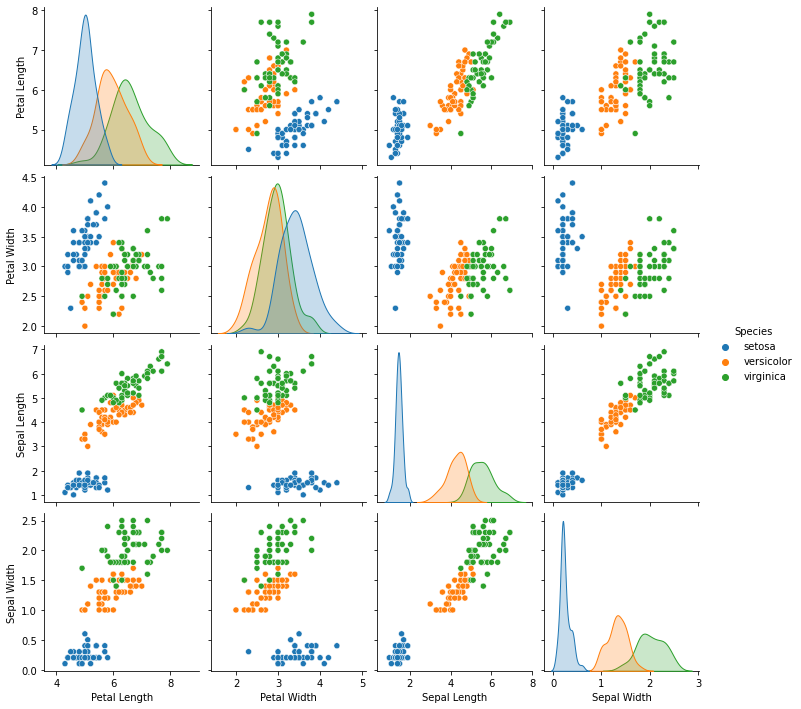

In [5]:
#Visualizing the class labels
sns.pairplot(data, hue = 'Species')
plt.show()

[]

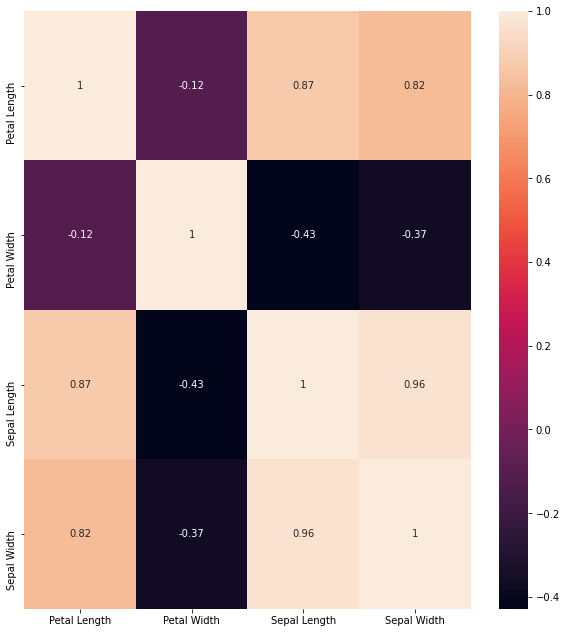

In [6]:
#Plotting the heatmap to see Correlation
plt.figure(figsize=(10,11))
sns.heatmap(data.corr(),annot=True)
plt.plot()

In [7]:
# Model Training
train,test=train_test_split(data,test_size=0.2)
X_train=train[["Petal Length","Petal Width","Sepal Length","Sepal Width"]]
y_train=train.Species
X_test=test[["Petal Length","Petal Width","Sepal Length","Sepal Width"]]
y_test=test.Species
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)
y_pred = tree_classifier.predict(X_test)

In [8]:
#Actual vs Predicted Flower Classification
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
76,versicolor,versicolor
4,setosa,setosa
50,versicolor,versicolor
21,setosa,setosa
29,setosa,setosa
128,virginica,virginica
99,versicolor,versicolor
144,virginica,virginica
139,virginica,virginica
41,setosa,setosa


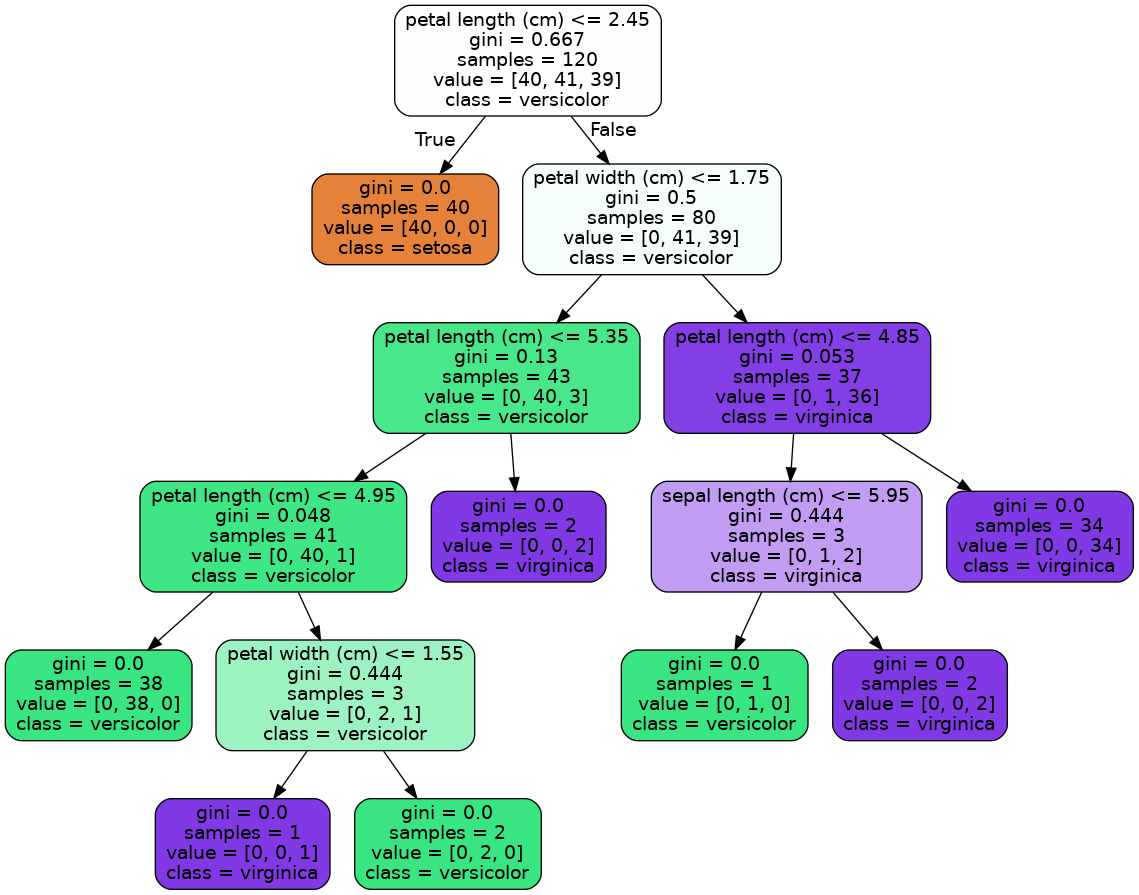

In [9]:
#Visualizing the Decision Tree Classifier
export_graphviz(
        tree_classifier,
        out_file="img\desision_tree.dot",
        feature_names=iris.feature_names[:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
)

(graph,) = pydot.graph_from_dot_file('img\desision_tree.dot')
graph.write_png('img\desision_tree.png')

Image(filename='img\desision_tree.png')

In [10]:
#Predicting the class of flower
tree_classifier.predict([[5.0, 3.7, 3.4, 3.9]])

array(['versicolor'], dtype=object)

In [11]:
# Model Accuracy
print("Accuracy of the model is :",sm.accuracy_score(y_test, y_pred))

Accuracy of the model is : 0.9666666666666667
